In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install geopandas --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# n_feature = 5000
seed = 42

In [ ]:
pois = pd.read_csv('/content/drive/MyDrive/dataset/madison/pois.csv')
pois = gpd.GeoDataFrame(pois, geometry=gpd.GeoSeries.from_wkt(pois.geometry), crs=4326)
pois = pois[(pois['OTHER_TAGS'].str.contains('amenity'))|(pois['OTHER_TAGS'].str.contains('shop'))|(pois['OTHER_TAGS'].str.contains('tourism'))]
# pois = pois[~(pois['CATEGORY'].isin(['SETTLEMENTS', 'LANDUSE']))].reset_index(drop=True)
pois['objectid'] = ['poi_']+pois['ID']
pois['source'] = 'poi'
pois=pois[['objectid', 'geometry', 'source']] #, 'CATEGORY', 'SUBCATEGORY'
# pois = pois.sample(n=n_feature) if n_feature<pois.shape[0] else pois
pois['geom_type'] = pois.geom_type

pois = pois[pois['geom_type'].isin(['Point', 'LineString', 'Polygon'])]
# pois.loc[pois['geom_type']=='GeometryCollection', 'geom_type'] = 'MultiPolygon'
pois.head()

,objectid,geometry,source,geom_type
0,poi_node/349364184,POINT (-89.27150 43.13555),poi,Point
1,poi_node/349364838,POINT (-89.40234 43.15888),poi,Point
2,poi_node/349365167,POINT (-89.39456 43.13833),poi,Point
3,poi_node/349372169,POINT (-89.36901 43.14601),poi,Point
4,poi_node/349373111,POINT (-89.30762 43.09861),poi,Point


In [ ]:
pd.value_counts(pois['geom_type'])

Point         1803
LineString    1532
Polygon         10
Name: geom_type, dtype: int64

In [ ]:
cbgs = pd.read_csv('/content/drive/MyDrive/dataset/madison/cbgs.csv', usecols=['GEOID', 'geometry'])
cbgs = gpd.GeoDataFrame(cbgs, geometry=gpd.GeoSeries.from_wkt(cbgs.geometry), crs=4326)
cbgs['objectid'] = ['census_']+cbgs['GEOID'].astype(str)
cbgs['source'] = 'cbg'
cbgs=cbgs[['objectid', 'geometry', 'source']]
cbgs['geom_type'] = cbgs.geom_type
cbgs = cbgs[cbgs['geom_type'].isin(['Point', 'LineString', 'Polygon'])]
print(cbgs.shape)
cbgs.head()

(261, 4)


,objectid,geometry,source,geom_type
0,census_550250004012,"POLYGON ((-89.45612 43.05362, -89.45611 43.060...",cbg,Polygon
1,census_550250015021,"POLYGON ((-89.39385 43.03608, -89.38281 43.038...",cbg,Polygon
2,census_550250015023,"POLYGON ((-89.38264 43.02795, -89.37923 43.027...",cbg,Polygon
3,census_550250020001,"POLYGON ((-89.34179 43.10456, -89.33873 43.107...",cbg,Polygon
4,census_550250020002,"POLYGON ((-89.34884 43.09348, -89.32585 43.105...",cbg,Polygon


In [ ]:

# pd.value_counts(cbgs['geom_type'])

In [ ]:
roads = pd.read_csv('/content/drive/MyDrive/dataset/madison/roads.csv')
roads = gpd.GeoDataFrame(roads, geometry=gpd.GeoSeries.from_wkt(roads.geometry), crs=4326)

print(roads.shape)
roads = roads[roads['area']!='yes']
print(roads.shape)
no_drive_list = ["abandoned","bridleway","bus_guideway","construction","corridor","cycleway","elevator",
                                       "escalator","footway","no","path","pedestrian","planned","platform","proposed","raceway","razed","service","steps","track"]
# roads = roads[~(roads['highway'].isin(no_drive_list))]
for t in no_drive_list:
    roads = roads[~(roads['highway'].str.contains(t))]

print(roads.shape)
# roads = roads[roads['motor_vehicle']!='no']
# print(roads.shape)
# roads = roads[roads['motor_car']!='no']
print(roads.shape)
roads = roads[~(roads["service"].isin(["alley","driveway","emergency_access","parking","parking_aisle","private"]))]
print(roads.shape)
roads['roundabout'] = roads['junction'].str.contains('roundabout')
roads['circular'] = roads['junction'].str.contains('circular')
roads = roads.reset_index(drop=True).reset_index()


roads['objectid'] = ['road_']+roads['id']
roads['source'] = 'link'
roads=roads[['objectid', 'geometry', 'source']]
roads['geom_type'] = roads.geom_type
# roads = roads.sample(n=n_feature)
print(roads.shape)
roads.head()

(246196, 22)
(246196, 22)
(68103, 22)
(68103, 22)
(68103, 22)
(68103, 4)


,objectid,geometry,source,geom_type
0,"road_(29981753, 258487848)","LINESTRING (-89.27745 43.05585, -89.27780 43.0...",link,LineString
1,"road_(29981753, 448790652)","LINESTRING (-89.27745 43.05585, -89.27783 43.0...",link,LineString
2,"road_(29982423, 2013406320)","LINESTRING (-89.33184 43.11205, -89.33089 43.1...",link,LineString
3,"road_(29983388, 439950021)","LINESTRING (-89.50310 43.05547, -89.50316 43.0...",link,LineString
4,"road_(30004439, 446182955)","LINESTRING (-89.35511 43.12184, -89.35511 43.1...",link,LineString


In [ ]:
pd.value_counts(roads['geom_type'])

LineString    68103
Name: geom_type, dtype: int64

In [ ]:

nodes = pd.read_csv('/content/drive/MyDrive/dataset/madison/nodes.csv', usecols=['osmid', 'geometry'])
nodes = gpd.GeoDataFrame(nodes, geometry=gpd.GeoSeries.from_wkt(nodes.geometry), crs=4326)
nodes['objectid'] = ['node_']+nodes['osmid'].astype(str)
nodes['source'] = 'intersection'
nodes=nodes[['objectid', 'geometry', 'source']]
nodes['geom_type'] = nodes.geom_type
# nodes = nodes.sample(n=n_feature)
print(nodes.shape)
nodes.head()

(86838, 4)


,objectid,geometry,source,geom_type
0,node_29981753,POINT (-89.27745 43.05585),intersection,Point
1,node_29982423,POINT (-89.33184 43.11205),intersection,Point
2,node_29983388,POINT (-89.50310 43.05547),intersection,Point
3,node_30004439,POINT (-89.35511 43.12184),intersection,Point
4,node_30004443,POINT (-89.35513 43.11869),intersection,Point


In [ ]:
pd.value_counts(nodes['geom_type'])

Point    86838
Name: geom_type, dtype: int64

In [ ]:
parcels = pd.read_csv('/content/drive/MyDrive/dataset/madison/parcels.csv', usecols=['PARCELID', 'geometry']) #
parcels = gpd.GeoDataFrame(parcels, geometry=gpd.GeoSeries.from_wkt(parcels.geometry), crs=4326)
parcels['objectid'] = ['parcel_']+parcels['PARCELID'].astype(str)
parcels['source'] = 'parcel'
parcels=parcels[['objectid', 'geometry', 'source']]

parcels['geom_type'] = parcels.geom_type
parcels = parcels[parcels['geom_type'].isin(['Point', 'LineString', 'Polygon'])]
# parcels = parcels.sample(n=n_feature)
print(parcels.shape)
parcels.head()

(115366, 4)


,objectid,geometry,source,geom_type
0,parcel_60801101019,"POLYGON ((-89.48388 43.03148, -89.48445 43.031...",parcel,Polygon
1,parcel_60801101035,"POLYGON ((-89.48407 43.03091, -89.48463 43.031...",parcel,Polygon
2,parcel_60801101043,"POLYGON ((-89.48439 43.03071, -89.48480 43.031...",parcel,Polygon
3,parcel_60801101069,"POLYGON ((-89.48498 43.03053, -89.48527 43.030...",parcel,Polygon
4,parcel_60801101134,"POLYGON ((-89.48368 43.03048, -89.48420 43.030...",parcel,Polygon


In [ ]:
pd.value_counts(parcels['geom_type'])

Polygon    115366
Name: geom_type, dtype: int64

In [ ]:
data = pd.concat([pois, roads, nodes, parcels, cbgs], axis=0)
print(data.shape[0])
data = data.loc[data['geometry'].is_valid].reset_index(drop=True)
print(data.shape[0])
data['geometry'] = data['geometry'].to_wkt(rounding_precision=4)
data = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(data['geometry']), crs=4326)

data['geometry'] = data['geometry'].simplify(1e-4, preserve_topology=True)
print(data.shape[0])
data = data.loc[data['geometry'].is_valid].reset_index(drop=True)
print(data.shape[0])
# data = gpd.GeoDataFrame(data.to_crs(3857), geometry='geometry', crs=3857, round=0)
# data= data.round(0)
pd.value_counts(data['geom_type'])

273913
273884
273884
269718


Polygon       114836
Point          88641
LineString     66241
Name: geom_type, dtype: int64

In [ ]:
data.loc[data['source']=='cbg'].head()

,objectid,geometry,source,geom_type
269458,census_550250004012,"POLYGON ((-89.45610 43.05360, -89.45610 43.060...",cbg,Polygon
269459,census_550250015021,"POLYGON ((-89.39380 43.03610, -89.38280 43.039...",cbg,Polygon
269460,census_550250015023,"POLYGON ((-89.38260 43.02800, -89.37920 43.027...",cbg,Polygon
269461,census_550250020001,"POLYGON ((-89.34180 43.10460, -89.33870 43.107...",cbg,Polygon
269462,census_550250020002,"POLYGON ((-89.34880 43.09350, -89.32580 43.105...",cbg,Polygon


In [ ]:
print(data.shape[0])
data = data.loc[~(data['geometry'].astype(str).str.contains('\)\, \('))].reset_index(drop=True) # remove polygon with holes
print(data.shape[0])

269718
269619


In [ ]:
print(data.shape[0])
data = data.loc[data['geometry'].is_valid].reset_index(drop=True)
print(data.shape[0])

269619
269619


In [ ]:
#omit long geometries

!pip install typing_extensions==4.7.1 --upgrade
!pip install tiktoken

import tiktoken

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.7.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [ ]:



# max_length_gpt2 = 1024
# # # embedding model parameters
# # embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002

# # encoding = tiktoken.get_encoding(embedding_encoding)
# encoding = tiktoken.encoding_for_model("gpt2")

# # omit reviews that are too long to embed
# data["n_tokens_gpt2"] = data['geometry'].astype(str).apply(lambda x: len(encoding.encode(x)))

# data["n_tokens_gpt2"].describe()



In [ ]:
# max_length_ada = 2048

# encoding = tiktoken.get_encoding(embedding_encoding)
encoding = tiktoken.encoding_for_model("text-embedding-ada-002")

# omit reviews that are too long to embed
data["n_tokens"] = data['geometry'].astype(str).apply(lambda x: len(encoding.encode(x))) #_ada

data["n_tokens"].describe() #_ada

count    269619.000000
mean         37.389579
std          27.517068
min           8.000000
25%          12.000000
50%          24.000000
75%          57.000000
max        1284.000000
Name: n_tokens, dtype: float64

In [ ]:
print(data.shape[0])
max_length = 768
data = data[(data["n_tokens"]<max_length)] #_ada (data["n_tokens_gpt2"]<=max_length)&
data = data.sample(frac=1, random_state=seed).sort_values(by=['geom_type', 'source']).reset_index(drop=True) #shuffle
print(data.shape[0])
data['idx'] = np.arange(data.shape[0])
data_first = data[['geom_type', 'idx', 'source']].drop_duplicates(subset=['geom_type', 'source'])
data = pd.merge(data, data_first,
                                 on=['geom_type', 'source'],
                                 how='left')
data['idx'] = data['idx_x'] - data['idx_y']
data = data.drop(columns=['idx_x', 'idx_y'])

269619
269618


In [ ]:

# eps = 1e-12
# data['geometry'] = data['geometry'].apply(lambda s: set_precision(s, eps))

## Find spatially related objects

In [ ]:


predicates = [
                        'overlaps',
                        'crosses',
                        'touches',
                        'within',
                        'contains',

]

# predicates = [
#                         'overlaps',
#                         'crosses',
#                         'touches',
#                         'within',
#                         'covers',

# ]

In [ ]:
from shapely import set_precision

# geom_mapping = {'point': point_set,
#                      'line': line_set,
#                      'polygon': polygon_set}
k = 0
eps = 1e-5
geom_mapping = {'point': data[data['geom_type']=='Point'],
                     'line': data[data['geom_type']=='LineString'],
                     'polygon': data[data['geom_type']=='Polygon']}

for geom_type in geom_mapping.keys():
    data_object = geom_mapping[geom_type]
    data_object['geometry'] = data_object['geometry'].apply(lambda s: set_precision(s, eps))
    # data_subject['geometry'] = data_subject['geometry'].set_precision(eps)
    for i in range(len(predicates)):
        rel = predicates[i]
        data_subject = data.rename(columns={'objectid': 'subjectid',
                                                           'geom_type': 'geom_type_subject'}).copy()
        data_subject['geometry'] = data_subject['geometry'].apply(lambda s: set_precision(s, eps))
        # if rel == 'contains':
        #     data_subject['geometry'] =  data_subject['geometry'] #.buffer(eps)
        # if rel == 'within':
        #     data_object['geometry'] =  data_object['geometry'] #.buffer(eps)
        # # data_subject = data[['objectid', 'geometry', 'geom_type']].rename(columns={'objectid': 'subjectid',
        # #                                                               'geom_type': 'geom_type_subject'})

        data_rel = data_subject.sjoin(data_object[['objectid', 'geometry', 'geom_type']],
                                       how='inner', predicate=rel)
        data_rel = data_rel.drop(columns='geometry')
        data_rel['predicate'] = rel if rel!= 'covers' else 'contains'
        data_rel = pd.merge(data_rel, data_subject[['subjectid', 'geometry']].rename(columns={'geometry': 'geometry_subject'}),
                            on='subjectid', how='inner')
        data_rel = pd.merge(data_rel, data_object[['objectid', 'geometry']],
                            on='objectid', how='inner')

        data_rel = gpd.GeoDataFrame(data_rel, geometry='geometry_subject', crs=4326)
        data_rel['relate'] = gpd.GeoSeries(data_rel['geometry_subject']).relate(data_rel['geometry'])
        data_rel['eq'] = gpd.GeoSeries(data_rel['geometry_subject']).geom_equals(data_rel['geometry'])

        data_rel = data_rel[(data_rel['subjectid']!=data_rel['objectid'])&(data_rel['eq']!=True)] #.drop_duplicates(subset=['subjectid', 'predicate'])

        # if rel=='within':
        #     data_equals = pd.merge(data_rel[['subjectid', 'objectid']],
        #                            (data_rel[['subjectid', 'objectid']]
        #                             .rename(columns={'subjectid':'objectid',
        #                                              'objectid': 'subjectid'})),
        #                            on=['subjectid', 'objectid'], how='inner')
        #     data_equals = pd.concat([data_equals[['subjectid', 'objectid']],
        #                            (data_equals[['subjectid', 'objectid']]
        #                             .rename(columns={'subjectid':'objectid',
        #                                              'objectid': 'subjectid'}))],
        #                             axis=0).reset_index(drop=True)


        if k==0:
            data_intersect = data_rel[['subjectid', 'objectid', 'predicate', 'geom_type', 'geom_type_subject', 'relate', 'eq']].copy()
            k+= 1
        else:
            data_intersect = pd.concat([data_intersect,
                                  data_rel[['subjectid', 'objectid', 'predicate', 'geom_type', 'geom_type_subject', 'relate', 'eq']].copy()],
                                  axis=0)
        print(geom_type, rel, data_rel.shape[0], data_intersect.shape[0])
data_intersect.head()

point overlaps 0 0
point crosses 0 0
point touches 219978 219978
point within 0 219978
point contains 300249 520227
line overlaps 408 520635
line crosses 44021 564656
line touches 558362 1123018
line within 2691 1125709
line contains 111839 1237548
polygon overlaps 230776 1468324
polygon crosses 42535 1510859
polygon touches 2757454 4268313
polygon within 517184 4785497
polygon contains 107787 4893284


,subjectid,objectid,predicate,geom_type,geom_type_subject,relate,eq
0,"road_(1358474408, 2547406556)",node_2547406556,touches,Point,LineString,FF10F0FF2,False
1,"road_(2547406556, 2547406619)",node_2547406556,touches,Point,LineString,FF10F0FF2,False
2,"road_(2547406556, 2547406559)",node_2547406556,touches,Point,LineString,FF10F0FF2,False
3,"road_(2547406556, 1358474408)",node_2547406556,touches,Point,LineString,FF10F0FF2,False
4,"road_(2547406559, 2547406556)",node_2547406556,touches,Point,LineString,FF10F0FF2,False


In [ ]:
data_intersect.to_csv('/content/drive/MyDrive/dataset/madison/input/intersect_intermediate.csv', index=False)

In [ ]:
data_intersect = data_intersect[data_intersect['eq']!=True].drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).reset_index(drop=True)
print(data_intersect.shape[0])

4579078


In [ ]:
data_intersect[['geom_type', 'geom_type_subject', 'predicate', 'objectid']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

objectid
geom_type_subject predicate geom_type           
LineString        contains  LineString       323
                            Point           2138
                  crosses   LineString      1482
                            Polygon        42022
                  overlaps  LineString       404
                  touches   LineString    363334
                            Polygon        41406
                  within    LineString       323
                            Polygon       108838
Point             touches   LineString    150288
                            Polygon        69192
                  within    LineString      2138
                            Polygon       298063
Polygon           contains  LineString    108838
                            Point         298063
                            Polygon       107787
                  overlaps  Polygon       230524
                  touches   Polygon      2646128
                  within    Polygon       107787

In [ ]:
temp = data_intersect[['subjectid', 'objectid']][(data_intersect['geom_type_subject']=='LineString')&(data_intersect['geom_type']=='LineString')&(data_intersect['predicate'].isin(['contains', 'withins']))]
temp.shape[0], temp.drop_duplicates().shape[0]

(323, 323)

In [ ]:
def geom_interpolate(points):
    n_points = points.shape[0]


    p_idx = np.sort(np.random.randint(0, n_points-1, int(np.ceil(n_points/10))))
    fracs = np.random.randint(1, 10, int(np.ceil(n_points/10)))
    # print(n_points, p_idx)

    for i in range(len(p_idx)):
        if i==0:
            coords = points[:p_idx[i]+1, :]
        # print(len(p_idx), len(fracs))
        pt = points[p_idx[i], :] + fracs[i] * 0.1  * (points[p_idx[i]+1, :]-points[p_idx[i], :])
        # print(pt)
        coords = np.vstack([coords, pt])
        if i<len(p_idx)-1:

            coords = np.vstack([coords, points[p_idx[i]+1: p_idx[i+1]+1, :]])
            # print(p_idx[i], points[p_idx[i]+1: p_idx[i+1]+1, :])

    return  np.vstack([coords, points[p_idx[i]+1:, :]])


def generate_line_equals(s):
    np.random.seed(seed)

    points = shapely.get_coordinates(s)

    coords = geom_interpolate(points)

    return shapely.geometry.LineString(np.round(coords, 6))

In [ ]:
line_line_euqals = line_set.sample(n=300, random_state=seed, replace=False)
print(len(set(line_line_euqals['objectid'])))
line_line_euqals['line'] = line_line_euqals['geometry'].apply(generate_line_equals)
line_line_euqals['subjectid'] = 'line_' + line_line_euqals['objectid']
line_line_euqals[['predicate', 'geom_type_subject']] = ['equals', 'LineString']
line_line_euqals['eq'] = line_line_euqals['geometry'].geom_equals(line_line_euqals['geometry'], align=False)

line_line_euqals['relate'] = line_line_euqals['geometry'].relate(line_line_euqals['geometry'], align=False)

line_euqals = line_line_euqals[['subjectid', 'line']].rename(columns={'line': 'geometry',
                                                                      'subjectid': 'objectid'})
line_euqals['source'] = 'equals_line'
line_euqals['geom_type'] = 'LineString'
line_euqals['idx'] = np.arange(line_euqals.shape[0])
print(line_line_euqals.shape[0], line_line_euqals.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).shape[0], np.sum(line_line_euqals['eq']))

300
300 300 300


In [ ]:
line_line_euqals['geometry'].astype(str).iloc[0], line_line_euqals['line'].astype(str).iloc[0]

('LINESTRING (-89.3264 43.0492, -89.3258 43.0493)',
 'LINESTRING (-89.3264 43.0492, -89.32598 43.04927, -89.3258 43.0493)')

<Axes: >

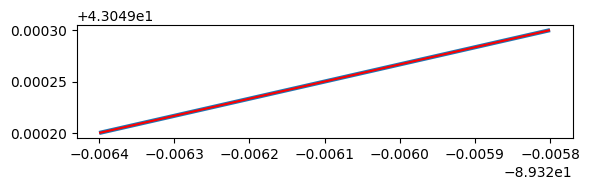

In [ ]:
ax = line_line_euqals.iloc[:1].plot(lw=3, )
line_line_euqals.set_geometry('line').iloc[:1].plot(ax=ax, color='r')

In [ ]:
def generate_polygon_equals(s):
    np.random.seed(seed)

    ex = s.exterior
    holes = list(s.interiors)

    ex_points = shapely.get_coordinates(ex)

    shift_idx = np.random.randint(ex_points.shape[0]-1)

    ex_points = np.round(np.vstack([ex_points[shift_idx:, :], ex_points[1: shift_idx, :]]), 5)

    ex_points = np.vstack([ex_points,  ex_points[:1, :]])

    ex_coords = geom_interpolate(ex_points)

    ex_interpolated = np.round(ex_coords, 6).tolist()

    holes_interpolated = []
    for hole in holes:
        hole_points = shapely.get_coordinates(hole)
        hole_points = np.round(np.vstack([hole_points[shift_idx:, :], hole_points[1: shift_idx, :]]), 5)

        hole_points = np.vstack([hole_points,  hole_points[:1, :]])

        hole_coords = geom_interpolate(hole_points)

        holes_interpolated.append(np.round(hole_coords, 6).tolist())

    if holes_interpolated:
          return shapely.geometry.Polygon(ex_interpolated, holes_interpolated)
    else:
          return shapely.geometry.Polygon(ex_interpolated)

In [ ]:
polygon_polygon_euqals = polygon_set.sample(n=300, random_state=seed, replace=False)
print(len(set(polygon_polygon_euqals['objectid'])))
polygon_polygon_euqals['polygon'] = polygon_polygon_euqals['geometry'].apply(generate_polygon_equals)
polygon_polygon_euqals['subjectid'] = 'polygon_' + polygon_polygon_euqals['objectid']
polygon_polygon_euqals[['predicate', 'geom_type_subject']] = ['equals', 'Polygon']
polygon_polygon_euqals['relate'] = polygon_polygon_euqals['geometry'].relate(polygon_polygon_euqals['geometry'], align=False)
polygon_polygon_euqals['eq'] = polygon_polygon_euqals['geometry'].geom_equals(polygon_polygon_euqals['geometry'], align=False)

polygon_euqals = polygon_polygon_euqals[['subjectid', 'polygon']].rename(columns={'polygon': 'geometry',
                                                                                  'subjectid': 'objectid'})
polygon_euqals['source'] = 'equals_polygon'
polygon_euqals['geom_type'] = 'Polygon'
polygon_euqals['idx'] = np.arange(polygon_euqals.shape[0])
print(polygon_polygon_euqals.shape[0], polygon_polygon_euqals.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).shape[0], polygon_polygon_euqals['eq'].sum())

300
300 300 300


<Axes: >

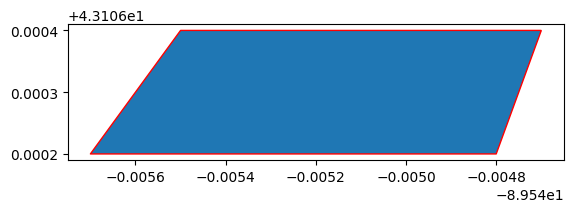

In [ ]:
i = 20
ax = polygon_polygon_euqals.iloc[i:i+1].plot(lw=3, )
polygon_polygon_euqals.set_geometry('polygon').iloc[i:i+1].plot(ax=ax, edgecolor='r', color='none')

In [ ]:
point_point_euqals = point_set[['objectid', 'geom_type', 'geometry']].sample(n=300, random_state=seed, replace=False)
point_point_euqals[['subjectid', 'geom_type_subject']] = point_point_euqals[['objectid', 'geom_type']].values
point_point_euqals['predicate'] = 'equals'
point_point_euqals['relate'] = point_point_euqals['geometry'].relate(point_point_euqals['geometry'], align=False)
point_point_euqals['relate'].value_counts()

0FFFFFFF2    300
Name: relate, dtype: int64

In [ ]:
cols = data_intersect.drop(columns=['eq', 'comb']).columns
data_equals = pd.concat([
                            point_point_euqals[cols], line_line_euqals[cols],
                            polygon_polygon_euqals[cols]],
                           axis=0)
print(data_equals.shape[0], data_equals.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).shape[0])
print(data_intersect.shape[0], data_intersect.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).shape[0])
data_intersect.head()

900 900
4579078 4579078


,subjectid,objectid,predicate,geom_type,geom_type_subject,relate,eq,comb
0,"road_(7396247516, 478453992)",node_3438531185,contains,Point,LineString,0F1FF0FF2,0,LineString/Point
1,"road_(478453992, 7396247516)",node_3438531185,contains,Point,LineString,0F1FF0FF2,0,LineString/Point
2,"road_(7396247516, 478453992)",node_3438531179,contains,Point,LineString,0F1FF0FF2,0,LineString/Point
3,"road_(478453992, 7396247516)",node_3438531179,contains,Point,LineString,0F1FF0FF2,0,LineString/Point
4,"road_(3438496289, 6775310019)",node_3438496280,contains,Point,LineString,0F1FF0FF2,0,LineString/Point


In [ ]:
# data_equals = pd.concat([
#                             point_point_euqals[cols], line_line_euqals[cols],
#                             polygon_polygon_euqals[cols]],
#                            axis=0)

In [ ]:
# data_intersect['sample'] = 0
# data_intersect.loc[~(data_intersect['objectid'].isin(set(data_samples['objectid']))), 'sample'] = 1

In [ ]:
cols= ['objectid', 'subjectid', 'geom_type', 'geom_type_subject', 'predicate', 'relate']
data_relations = pd.concat([data_intersect[cols], data_equals[cols]], axis=0).reset_index(drop=True)
data_relations = data_relations.drop_duplicates(subset=['subjectid', 'objectid', 'predicate'])

data_relations['sample_subject'] = 1
data_relations.loc[data_relations['subjectid'].isin(data_samples['objectid']), 'sample_subject'] = 0
data_relations['sample_object'] = 1
data_relations.loc[data_relations['objectid'].isin(data_samples['objectid']), 'sample_object'] = 0

n_samples = 300


data_relations = data_relations.sort_values(by=['geom_type_subject', 'predicate', 'geom_type', 'sample_object', 'sample_subject', 'objectid', 'subjectid']).reset_index(drop=True)
# data_relations = data_relations.sort_values(by=['relate', 'sample_object', 'sample_subject', 'objectid', 'subjectid']).reset_index(drop=True)
data_relations['idx'] = np.arange(data_relations.shape[0])
data_relations_first = data_relations[['geom_type', 'geom_type_subject', 'predicate', 'idx']].drop_duplicates(subset=['geom_type', 'geom_type_subject', 'predicate'])
# data_relations_first = data_relations[['relate', 'idx']].drop_duplicates(subset=['relate'])
data_relations = pd.merge(data_relations, data_relations_first,
                                 on=['geom_type', 'geom_type_subject', 'predicate'],
                                 how='left')
data_relations['idx'] = data_relations['idx_x'] - data_relations['idx_y']
data_relations = data_relations[data_relations['idx']<n_samples].drop(columns=['idx_x', 'idx_y'])
print(data_relations.shape[0], data_relations.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).shape[0])
data_relations = data_relations.drop_duplicates(subset=['subjectid', 'objectid', 'predicate'])
data_relations[['objectid', 'geom_type', 'geom_type_subject', 'predicate']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

6600 6600


objectid
geom_type_subject predicate geom_type           
LineString        contains  LineString       300
                            Point            300
                  crosses   LineString       300
                            Polygon          300
                  equals    LineString       300
                  overlaps  LineString       300
                  touches   LineString       300
                            Polygon          300
                  within    LineString       300
                            Polygon          300
Point             equals    Point            300
                  touches   LineString       300
                            Polygon          300
                  within    LineString       300
                            Polygon          300
Polygon           contains  LineString       300
                            Point            300
                            Polygon          300
                  equals    Polygon          300
                  overlaps  Polygon          300
                  touches   Polygon          300
                  within    Polygon          300

In [ ]:
cols = ['objectid', 'geometry', 'source', 'geom_type']
data_samples = pd.concat([data[cols].drop_duplicates(subset='objectid'), polygon_euqals[cols], line_euqals[cols]],
                 axis=0).reset_index(drop=True)
data_samples = data_samples[data_samples['objectid'].isin(set(data_relations['subjectid'])|set(data_relations['objectid']))]
data_samples.shape[0]

5776

In [ ]:
temp_subject = data_samples[['objectid', 'geometry']].rename(columns={'objectid': 'subjectid'})
temp_subject['geometry'] = temp_subject['geometry'].buffer(1e-6)
temp_object = data_samples[['objectid', 'geometry']]
temp_object['geometry'] = temp_object['geometry'].buffer(1e-6)

df = gpd.overlay(temp_subject,temp_object, how='intersection')
df['predicate'] = 'intersects'
df.shape[0]

30274

In [ ]:
# disjoint relations
np.random.seed(seed)
data_samples['idx'] = np.arange(data_samples.shape[0])
data_disjoint = data_samples[['objectid', 'geometry', 'geom_type']].copy()
data_disjoint['idx'] = np.random.choice(np.arange(data_samples.shape[0]), data_samples.shape[0], replace=False)
data_disjoint = pd.merge(data_disjoint, data_samples[['idx', 'objectid', 'geometry', 'geom_type']].rename(columns={'objectid': 'subjectid',
                                                                                                                   'geometry': 'geometry_subject',
                                                                                      'geom_type': 'geom_type_subject'}),
                           on='idx', how='inner')
data_disjoint['relate'] = data_disjoint['geometry_subject'].relate(data_disjoint['geometry'])
data_disjoint = pd.merge(data_disjoint, df[['subjectid', 'objectid', 'predicate']],
                           on=['objectid', 'subjectid'], how='left')
data_disjoint = data_disjoint.fillna('disjoint')
data_disjoint = data_disjoint[data_disjoint['predicate']=='disjoint']
# data_disjoint['sample']= 0
print(data_disjoint.shape[0])
print(data_disjoint.shape[0], data_disjoint.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).shape[0])
data_disjoint['relate'].value_counts()

5773
5773 5773


FF0FFF0F2    516
FF0FFF102    474
FF2FF10F2    471
FF0FFF212    449
FF1FF00F2    441
FF1FF0102    435
FF1FF0212    434
FF2FF1212    423
FF2FF1102    396
FF2FF11F2    275
FF1FFF0F2    272
FF1FFF102    261
FF0FFF1F2    260
FF1FFF212    258
FF1FF01F2    256
FF1FFF1F2    152
Name: relate, dtype: int64

In [ ]:
data_intersect.columns

Index(['subjectid', 'objectid', 'predicate', 'geom_type', 'geom_type_subject',
       'relate', 'eq', 'comb'],
      dtype='object')

In [ ]:
cols= ['objectid', 'subjectid', 'geom_type', 'geom_type_subject', 'predicate', 'relate']
data_relations = pd.concat([data_relations[cols], data_disjoint[cols]], axis=0).reset_index(drop=True)
data_relations = data_relations.drop_duplicates(subset=['subjectid', 'objectid', 'predicate'])

data_relations['sample_subject'] = 1
data_relations.loc[data_relations['subjectid'].isin(data_samples['objectid']), 'sample_subject'] = 0
data_relations['sample_object'] = 1
data_relations.loc[data_relations['objectid'].isin(data_samples['objectid']), 'sample_object'] = 0

In [ ]:
n_samples = 300


data_relations = data_relations.sort_values(by=['geom_type_subject', 'predicate', 'geom_type', 'sample_object', 'sample_subject', 'objectid', 'subjectid']).reset_index(drop=True)
# data_relations = data_relations.sort_values(by=['relate', 'sample_object', 'sample_subject', 'objectid', 'subjectid']).reset_index(drop=True)
data_relations['idx'] = np.arange(data_relations.shape[0])
data_relations_first = data_relations[['geom_type', 'geom_type_subject', 'predicate', 'idx']].drop_duplicates(subset=['geom_type', 'geom_type_subject', 'predicate'])
# data_relations_first = data_relations[['relate', 'idx']].drop_duplicates(subset=['relate'])
data_relations = pd.merge(data_relations, data_relations_first,
                                 on=['geom_type', 'geom_type_subject', 'predicate'],
                                 how='left')
data_relations['idx'] = data_relations['idx_x'] - data_relations['idx_y']
data_relations = data_relations[data_relations['idx']<n_samples].drop(columns=['idx_x', 'idx_y'])
print(data_relations.shape[0], data_relations.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).shape[0])
data_relations = data_relations.drop_duplicates(subset=['subjectid', 'objectid', 'predicate'])
data_relations[['objectid', 'geom_type', 'geom_type_subject', 'predicate']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

9300 9300


objectid
geom_type_subject predicate geom_type           
LineString        contains  LineString       300
                            Point            300
                  crosses   LineString       300
                            Polygon          300
                  disjoint  LineString       300
                            Point            300
                            Polygon          300
                  equals    LineString       300
                  overlaps  LineString       300
                  touches   LineString       300
                            Polygon          300
                  within    LineString       300
                            Polygon          300
Point             disjoint  LineString       300
                            Point            300
                            Polygon          300
                  equals    Point            300
                  touches   LineString       300
                            Polygon          300
                  within    LineString       300
                            Polygon          300
Polygon           contains  LineString       300
                            Point            300
                            Polygon          300
                  disjoint  LineString       300
                            Point            300
                            Polygon          300
                  equals    Polygon          300
                  overlaps  Polygon          300
                  touches   Polygon          300
                  within    Polygon          300

In [ ]:
cols = ['objectid', 'geometry', 'source', 'geom_type']
data_samples = pd.concat([data[cols].drop_duplicates(subset='objectid'), polygon_euqals[cols], line_euqals[cols]],
                 axis=0).reset_index(drop=True)
data_samples = data_samples[data_samples['objectid'].isin(set(data_relations['subjectid'])|set(data_relations['objectid']))]
print(data_samples.shape[0])
data_samples = data_samples[data_samples.is_valid]
data_samples.shape[0]

5776


5776

In [ ]:
data_relations.head()

,objectid,subjectid,geom_type,geom_type_subject,predicate,relate,sample_subject,sample_object,idx
0,poi_way/1134399612,poi_way/1134399613,LineString,LineString,contains,1F1FFFFF2,0,0,0
1,poi_way/682541526,poi_way/682541525,LineString,LineString,contains,1F1FFFFF2,0,0,1
2,"road_(10289236156, 3590603502)",poi_way/287637061,LineString,LineString,contains,101FFFFF2,0,0,2
3,"road_(10781526611, 5035134454)","road_(5035134455, 5035134446)",LineString,LineString,contains,101F00FF2,0,0,3
4,"road_(1223055458, 1222841156)","road_(1223055505, 1222841156)",LineString,LineString,contains,101F00FF2,0,0,4


In [ ]:
data_relations[['objectid', 'predicate']].groupby('predicate').count().rename(columns={'objectid': 'count'})

,count
predicate,
contains,1500
crosses,600
disjoint,2700
equals,900
overlaps,600
touches,1500
within,1500


In [ ]:
data_relations.shape

(9300, 9)

In [ ]:
data_relations[['subjectid', 'objectid', 'predicate', 'relate', 'idx']].to_csv('/content/drive/MyDrive/dataset/madison/input/relations_update.csv', index=False)

In [ ]:
cols = ['objectid', 'geometry', 'source', 'geom_type']
data_samples = pd.concat([data[cols].drop_duplicates(subset='objectid'), polygon_euqals[cols], line_euqals[cols]],
                 axis=0).reset_index(drop=True)
data_samples = data_samples[data_samples['objectid'].isin(set(data_relations['subjectid'])|set(data_relations['objectid']))]
data_samples.shape[0]

5776

In [ ]:
data_samples.head()

,objectid,geometry,source,geom_type
1,"road_(6231530142, 3861040918)","LINESTRING (-89.47190 43.05000, -89.47200 43.0...",link,LineString
3,"road_(53591318, 1179412798)","LINESTRING (-89.47700 43.06930, -89.47700 43.0...",link,LineString
7,"road_(1178722373, 1178722211)","LINESTRING (-89.46260 43.05530, -89.46270 43.0...",link,LineString
12,"road_(53430628, 53468282)","LINESTRING (-89.30450 43.02460, -89.30530 43.0...",link,LineString
14,"road_(3444117858, 6680557104)","LINESTRING (-89.50810 43.00660, -89.50720 43.0...",link,LineString


In [ ]:
data_samples.to_wkt(rounding_precision=5).to_csv('/content/drive/MyDrive/dataset/madison/input/objects_update.csv', index=False)
# data_relations.to_csv('/content/drive/MyDrive/madison_data/task2_relations.csv', index=False)

## Compute all intersected objects

In [ ]:
from shapely import set_precision

In [ ]:
# objects = pd.read_csv('/content/drive/MyDrive/dataset/madison/input/objects_update_embeddings.csv')
# objects.to_csv('/content/drive/MyDrive/dataset/madison/output/objects_update_embeddings.csv', index=False)
data_samples = pd.read_csv('/content/drive/MyDrive/dataset/madison/input/objects_update.csv')
data_samples = gpd.GeoDataFrame(data_samples, geometry=gpd.GeoSeries.from_wkt(data_samples['geometry']), crs=4326)
# data_samples[['embedding_ada']] = data_samples[['embedding_ada']].applymap(lambda s: np.array(eval(s)))
data_samples = data_samples[['objectid', 'geometry', 'geom_type']]
data_samples['geometry'] = data_samples['geometry'].apply(lambda s: set_precision(s, 1e-5))
data_samples.head()

,objectid,geometry,geom_type
0,"road_(6231530142, 3861040918)","LINESTRING (-89.47190 43.05000, -89.47200 43.0...",LineString
1,"road_(53591318, 1179412798)","LINESTRING (-89.47700 43.06930, -89.47700 43.0...",LineString
2,"road_(1178722373, 1178722211)","LINESTRING (-89.46260 43.05530, -89.46270 43.0...",LineString
3,"road_(53430628, 53468282)","LINESTRING (-89.30450 43.02460, -89.30530 43.0...",LineString
4,"road_(3444117858, 6680557104)","LINESTRING (-89.50810 43.00660, -89.50720 43.0...",LineString


In [ ]:
subjects = data_samples[['objectid', 'geom_type', 'geometry']].rename(columns={'objectid': 'subjectid',
                                        'geom_type': 'geom_type_subject'}).copy()
subjects['geometry'] = subjects.buffer(1e-3)
subjects['geometry'] = subjects['geometry'].apply(lambda s: set_precision(s, 5e-6))

objects = data_samples[['objectid', 'geom_type', 'geometry']].copy()
objects['geometry'] = objects.buffer(5e-3)
objects['geometry'] = objects['geometry'].apply(lambda s: set_precision(s, 5e-6))


buffer_intersect = gpd.overlay(subjects,
                             objects, how='intersection', keep_geom_type=False)
buffer_intersect = buffer_intersect[['subjectid', 'objectid','geom_type_subject', 'geom_type']]
buffer_intersect = pd.merge(data_samples[['objectid', 'geometry']].rename(columns={'objectid': 'subjectid',
                                                               'geometry': 'geometry_subject'}),
                          buffer_intersect, on='subjectid', how='right')
buffer_intersect = pd.merge(data_samples[['objectid', 'geometry']],
                          buffer_intersect, on='objectid', how='right')

buffer_intersect.shape[0]

357552

In [ ]:
buffer_intersect['geometry_subject'] = buffer_intersect['geometry_subject'].apply(lambda s: set_precision(s, 5e-6))
buffer_intersect['geometry'] = buffer_intersect['geometry'].apply(lambda s: set_precision(s, 5e-6))

In [ ]:
predicates = ['geom_equals',
                        'overlaps',
                        'crosses',
                        'touches',
                        'within',
                        'contains',

]

i = 0
for rel in predicates:
  f = getattr(buffer_intersect['geometry_subject'], rel)
  res = f(buffer_intersect['geometry'], align=False)

  temp = buffer_intersect[res==1]
  temp['predicate'] = rel
  temp['pid'] = i
  temp['relate'] = temp['geometry_subject'].relate(temp['geometry'])

  if i==0:
      intersect = temp.copy()

  else:
      intersect = pd.concat([intersect, temp], axis=0)
  i += 1


intersect['predicate'] = intersect['predicate'].str.replace('geom_equals', 'equals')
intersect.head()

,objectid,geometry,subjectid,geometry_subject,geom_type_subject,geom_type,predicate,pid,relate
0,"road_(6231530142, 3861040918)","LINESTRING (-89.47190 43.05000, -89.47200 43.0...","road_(6231530142, 3861040918)","LINESTRING (-89.47190 43.05000, -89.47200 43.0...",LineString,LineString,equals,0,1FFF0FFF2
35,"road_(3326465581, 2633816225)","LINESTRING (-89.47340 43.05180, -89.47340 43.0...","road_(3326465581, 2633816225)","LINESTRING (-89.47340 43.05180, -89.47340 43.0...",LineString,LineString,equals,0,1FFF0FFF2
74,"road_(53366398, 53630789)","LINESTRING (-89.46840 43.05530, -89.46890 43.0...","road_(53366398, 53630789)","LINESTRING (-89.46840 43.05530, -89.46890 43.0...",LineString,LineString,equals,0,1FFF0FFF2
118,"road_(2799423625, 452150775)","LINESTRING (-89.47360 43.04610, -89.47360 43.0...","road_(2799423625, 452150775)","LINESTRING (-89.47360 43.04610, -89.47360 43.0...",LineString,LineString,equals,0,1FFF0FFF2
148,"road_(7996796775, 53461395)","LINESTRING (-89.46730 43.05230, -89.46720 43.0...","road_(7996796775, 53461395)","LINESTRING (-89.46730 43.05230, -89.46720 43.0...",LineString,LineString,equals,0,1FFF0FFF2


In [ ]:
# len(set(zip(line_contains_line['subjectid'], line_contains_line['objectid'])) - set(zip(line_within_line['subjectid'], line_within_line['objectid'])))

In [ ]:
intersect = intersect.sort_values(by='pid').drop_duplicates(subset=['subjectid', 'objectid'], keep='first')
intersect[['objectid', 'geom_type', 'geom_type_subject', 'predicate']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

objectid
geom_type_subject predicate geom_type           
LineString        contains  LineString       232
                            Point            525
                  crosses   LineString       335
                            Polygon          480
                  equals    LineString      3164
                  overlaps  LineString       481
                  touches   LineString      1454
                            Point            521
                            Polygon          445
                  within    LineString       226
                            Polygon         2570
Point             equals    Point           1941
                  touches   LineString       521
                            Polygon          401
                  within    LineString       425
                            Polygon         1806
Polygon           contains  LineString      2570
                            Point           1806
                            Polygon         1529
                  crosses   LineString       478
                  equals    Polygon         3288
                  overlaps  Polygon         1422
                  touches   LineString       444
                            Point            401
                            Polygon          988
                  within    Polygon         1529

In [ ]:
intersect[intersect['objectid'].str.contains('line')]

,objectid,geometry,subjectid,geometry_subject,geom_type_subject,geom_type,predicate,pid,relate
272106,"line_road_(1315817238, 3733245718)","LINESTRING (-89.49630 43.00370, -89.49637 43.0...","line_road_(1315817238, 3733245718)","LINESTRING (-89.49630 43.00370, -89.49637 43.0...",LineString,LineString,equals,0,1FFF0FFF2
274122,"line_road_(4214030721, 53424801)","LINESTRING (-89.43360 43.05610, -89.43360 43.0...","line_road_(4214030721, 53424801)","LINESTRING (-89.43360 43.05610, -89.43360 43.0...",LineString,LineString,equals,0,1FFF0FFF2
274091,"line_road_(4214030721, 53424801)","LINESTRING (-89.43360 43.05610, -89.43360 43.0...","road_(4214030721, 53424801)","LINESTRING (-89.43360 43.05610, -89.43360 43.0...",LineString,LineString,equals,0,1FFF0FFF2
272047,"line_road_(1315817238, 3733245718)","LINESTRING (-89.49630 43.00370, -89.49637 43.0...","road_(1315817238, 3733245718)","LINESTRING (-89.49630 43.00370, -89.49640 43.0...",LineString,LineString,equals,0,1FFF0FFF2
272042,"line_road_(1315784564, 1315784444)","LINESTRING (-89.49450 43.00590, -89.49471 43.0...","line_road_(1315784564, 1315784444)","LINESTRING (-89.49450 43.00590, -89.49471 43.0...",LineString,LineString,equals,0,1FFF0FFF2
...,...,...,...,...,...,...,...,...,...
145392,"line_road_(5474176956, 450880361)","LINESTRING (-89.35450 43.04260, -89.35450 43.0...",census_550250015022,"POLYGON ((-89.36880 43.04330, -89.35420 43.043...",Polygon,LineString,contains,5,102FF1FF2
139378,"line_road_(53501488, 53425648)","LINESTRING (-89.47710 43.02780, -89.47591 43.0...",census_550250005013,"POLYGON ((-89.48310 43.03190, -89.47340 43.031...",Polygon,LineString,contains,5,102FF1FF2
146258,line_poi_way/297756531,"LINESTRING (-89.33310 43.12200, -89.33150 43.1...",census_550250025001,"POLYGON ((-89.35420 43.14740, -89.34240 43.153...",Polygon,LineString,contains,5,1F2FF1FF2
146704,"line_road_(7764476402, 8425862707)","LINESTRING (-89.53630 43.09840, -89.53623 43.0...",census_550250109081,"POLYGON ((-89.59340 43.12200, -89.58880 43.125...",Polygon,LineString,contains,5,102FF1FF2


In [ ]:


relations_other = intersect[intersect['predicate']!='equals']
# relations_other = relations_other[~(relations_other['objectid'].str.contains('line'))]
# relations_other = relations_other[~(relations_other['subjectid'].str.contains('line'))]
# relations_other = relations_other[~(relations_other['objectid'].str.contains('polygon'))]
# relations_other = relations_other[~(relations_other['subjectid'].str.contains('polygon'))]
relations_other = relations_other[relations_other['objectid']!=relations_other['subjectid']].drop_duplicates(subset=['subjectid', 'objectid', 'predicate'])

relations_other[['objectid', 'geom_type', 'geom_type_subject', 'predicate']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

objectid
geom_type_subject predicate geom_type           
LineString        contains  LineString       232
                            Point            525
                  crosses   LineString       335
                            Polygon          480
                  overlaps  LineString       481
                  touches   LineString      1454
                            Point            521
                            Polygon          445
                  within    LineString       226
                            Polygon         2570
Point             touches   LineString       521
                            Polygon          401
                  within    LineString       425
                            Polygon         1806
Polygon           contains  LineString      2570
                            Point           1806
                            Polygon         1529
                  crosses   LineString       478
                  overlaps  Polygon         1422
                  touches   LineString       444
                            Point            401
                            Polygon          988
                  within    Polygon         1529

In [ ]:
relations_equal = intersect[intersect['predicate']=='equals']
# relations_equal = relations_equal[~(relations_equal['objectid'].str.contains('line'))]
# relations_equal = relations_equal[~(relations_equal['objectid'].str.contains('polygon'))]
relations_equal = relations_equal[(relations_equal['objectid']!=relations_equal['subjectid'])|(relations_equal['geom_type']=='Point')]
relations_equal = relations_equal[(relations_equal['subjectid'].str.contains('line'))|
 (relations_equal['objectid'].str.contains('line'))|(relations_equal['subjectid'].str.contains('polygon'))|
                                  (relations_equal['objectid'].str.contains('polygon'))|
  (relations_equal['geom_type']=='Point')].drop_duplicates(subset=['subjectid', 'objectid', 'predicate'])
relations_equal[['objectid', 'geom_type', 'geom_type_subject', 'predicate']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

,,,objectid
geom_type_subject,predicate,geom_type,
LineString,equals,LineString,328
Point,equals,Point,1941
Polygon,equals,Polygon,362


In [ ]:
relations_disjoint = pd.merge(buffer_intersect, intersect[['subjectid', 'objectid', 'predicate']], on=['subjectid', 'objectid'], how='left')
relations_disjoint['predicate'] = relations_disjoint['predicate'].fillna('disjoint')
relations_disjoint = relations_disjoint[relations_disjoint['predicate']=='disjoint'].drop_duplicates(subset=['subjectid', 'objectid', 'predicate'])
relations_disjoint['relate'] = relations_disjoint['geometry_subject'].relate(relations_disjoint['geometry'])
relations_disjoint[['objectid', 'geom_type', 'geom_type_subject', 'predicate']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

objectid
geom_type_subject predicate geom_type           
LineString        disjoint  LineString     54931
                            Point          40709
                            Polygon        32304
Point             disjoint  LineString     40340
                            Point          40298
                            Polygon        26981
Polygon           disjoint  LineString     32285
                            Point          26980
                            Polygon        32742

In [ ]:
n_samples = 225

relations = pd.concat([relations_other, relations_equal, relations_disjoint], axis=0)

relations = relations.sample(frac=1, random_state=seed).sort_values(by=['geom_type_subject', 'predicate', 'geom_type']).reset_index(drop=True)
# relations = relations.sort_values(by=['relate', 'sample_object', 'sample_subject', 'objectid', 'subjectid']).reset_index(drop=True)
relations['idx'] = np.arange(relations.shape[0])
relations_first = relations[['geom_type', 'geom_type_subject', 'predicate', 'idx']].drop_duplicates(subset=['geom_type', 'geom_type_subject', 'predicate'])
# relations_first = relations[['relate', 'idx']].drop_duplicates(subset=['relate'])
relations = pd.merge(relations, relations_first,
                                 on=['geom_type', 'geom_type_subject', 'predicate'],
                                 how='left')
relations['idx'] = relations['idx_x'] - relations['idx_y']
relations = relations[relations['idx']<n_samples].drop(columns=['idx_x', 'idx_y'])
print(relations.shape[0], relations.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).shape[0])
relations = relations.drop_duplicates(subset=['subjectid', 'objectid', 'predicate']).reset_index(drop=True)
relations[['objectid', 'geom_type', 'geom_type_subject', 'predicate']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count()

7875 7875


objectid
geom_type_subject predicate geom_type           
LineString        contains  LineString       225
                            Point            225
                  crosses   LineString       225
                            Polygon          225
                  disjoint  LineString       225
                            Point            225
                            Polygon          225
                  equals    LineString       225
                  overlaps  LineString       225
                  touches   LineString       225
                            Point            225
                            Polygon          225
                  within    LineString       225
                            Polygon          225
Point             disjoint  LineString       225
                            Point            225
                            Polygon          225
                  equals    Point            225
                  touches   LineString       225
                            Polygon          225
                  within    LineString       225
                            Polygon          225
Polygon           contains  LineString       225
                            Point            225
                            Polygon          225
                  crosses   LineString       225
                  disjoint  LineString       225
                            Point            225
                            Polygon          225
                  equals    Polygon          225
                  overlaps  Polygon          225
                  touches   LineString       225
                            Point            225
                            Polygon          225
                  within    Polygon          225

In [ ]:
relations.head()

,objectid,geometry,subjectid,geometry_subject,geom_type_subject,geom_type,predicate,pid,relate,idx
0,"road_(53496379, 5657142535)","LINESTRING (-89.33860 43.09220, -89.33870 43.0...","road_(5656899646, 53496379)","LINESTRING (-89.33970 43.09220, -89.33860 43.0...",LineString,LineString,contains,5.0,101F00FF2,0
1,"road_(2634716954, 8997363243)","LINESTRING (-89.35540 43.13570, -89.35540 43.1...","road_(8997363242, 2634716954)","LINESTRING (-89.35540 43.13510, -89.35540 43.1...",LineString,LineString,contains,5.0,101F00FF2,1
2,poi_way/1134399612,"LINESTRING (-89.45240 43.07150, -89.45210 43.0...",poi_way/1134399613,"LINESTRING (-89.45240 43.07160, -89.45210 43.0...",LineString,LineString,contains,5.0,1F1FFFFF2,2
3,"road_(1998162788, 1998162839)","LINESTRING (-89.33800 43.06590, -89.33780 43.0...",poi_way/257174438,"LINESTRING (-89.33920 43.06370, -89.33990 43.0...",LineString,LineString,contains,5.0,101FFFFF2,3
4,"road_(3420767254, 3590603510)","LINESTRING (-89.51750 43.06110, -89.51750 43.0...",poi_way/287637061,"LINESTRING (-89.51680 43.06060, -89.51680 43.0...",LineString,LineString,contains,5.0,101FFFFF2,4


In [ ]:
relations[['objectid', 'geom_type', 'geom_type_subject', 'predicate', 'idx']].groupby(['geom_type_subject', 'predicate', 'geom_type']).count().shape

(35, 2)

In [ ]:
relations.to_csv('/content/drive/MyDrive/dataset/madison/input/relations.csv', index=False)

In [ ]:
intersect.to_csv('/content/drive/MyDrive/dataset/madison/input/intersections.csv', index=False)

In [ ]:
data_samples.to_csv('/content/drive/MyDrive/dataset/madison/input/objects.csv', index=False)